# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Disclaimer:**  
This notebook was generated with the assistance of AI and has not been fully verified by human experts. Please use caution, check the code when adapting for your own analysis, and do not rely solely on the results/conclusions shown here.

[Dandiset 000690, version 0.250326.0015 on DANDI Archive](https://dandiarchive.org/dandiset/000690/0.250326.0015)

---

## Overview

**Dandiset Name:** Allen Institute Openscope - Vision2Hippocampus project  
**Version:** 0.250326.0015  
**Description:**  
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, hippocampal neurons are thought to encode more abstract representations (space, time, events). This dataset examines how neural representations of both simple and natural visual stimuli evolve from thalamus through V1 and hippocampus in the mouse brain.  

**Main data modalities:** Extracellular electrophysiology (Neuropixels), LFP, spike sorting, electrode and device metadata.

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies

**Citation:**  
Mehta, Mayank R; Purandare, Chinmay; Jha, Siddharth; Lecoq, Jérôme; Durand, Séverine; Gillis, Ryan; Belski, Hannah; Bawany, Ahad; Carlson, Mikayla; Peene, Carter; Wilkes, Josh; Johnson, Tye; Naidoo, Robyn; Suarez, Lucas; Han, Warren; Amaya, Avalon; Nguyen, Katrina; Ouellette, Ben; Swapp, Jackie; Williford, Ali (2025) Allen Institute Openscope - Vision2Hippocampus project (Version 0.250326.0015) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000690/0.250326.0015

---

## What this notebook covers

- Lists and describes some available files in the Dandiset
- Demonstrates how to connect to the DANDI archive programmatically
- Shows how to load an example NWB (Neurodata Without Borders) file and explore its metadata and LFP recordings
- Demonstrates how to inspect electrode metadata and view basic summaries
- Shows basic visualizations of LFP data from the example file
- Provides links to interactively explore the data on neurosift.app
- Summarizes findings and gives suggestions for further exploration

The primary goal is to demonstrate how to access, inspect, and analyze this rich dataset, and empower you to perform your own analyses.

## Required packages

This notebook assumes you have the following Python packages installed:

- numpy
- matplotlib
- pandas
- dandi
- pynwb
- h5py
- remfile (for remote file streaming)

(These are not installed automatically in this notebook.)

In [1]:
# Import necessary packages for analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import dandi.dandiapi
import remfile
import h5py
import pynwb

## Exploring the Dandiset using the DANDI API

Let's connect to the DANDI Archive, load Dandiset 000690 (version 0.250326.0015), inspect some of its metadata, and print out a few example assets.

This step is to help orient you to the range of files included.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets in the Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets in the Dandiset:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Selecting an NWB file to explore

For demonstration, we'll focus on the following file (which contains LFP data from one probe):

**File path:** `sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`  
**DANDI asset ID:** `ba8760f9-91fe-4c1c-97e6-590bed6a783b`

The file can be accessed directly via:

`https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/`

You can also explore it interactively in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft).

## Loading the NWB file (streaming from DANDI)

We will use `remfile`, `h5py`, and `pynwb` to stream and load this large NWB file directly over HTTP without downloading the full file.

**Note:** Loading can take some time due to the size of the file and network latency.

In [3]:
import pynwb
import h5py
import remfile

# Load the NWB file from DANDI asset URL
nwb_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file, mode='r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Print some session-level metadata
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}, species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: LFP data and associated info for one probe
Session start time: 2023-09-21 00:00:00-07:00
Subject ID: 692072, species: Mus musculus


## High-level summary of the NWB file contents

- **Session description:** LFP data and associated info for one probe  
- **Session start time:** 2023-09-21T00:00:00-07:00  
- **Subject:**  
  - ID: 692072  
  - Age: P82D  
  - Genotype: wt/wt  
  - Sex: M  
  - Species: Mus musculus  

- **Probe:** Neuropixels 1.0, manufacturer imec, 95 LFP channels  

- **Main contents:**  
  - Local field potential (LFP) time series  
  - Electrode channel metadata  

**Key objects:**  
- `nwb.acquisition['probe_0_lfp']`  
- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data']`  
- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].data`  
- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].timestamps`  
- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].electrodes.table` (channel metadata: 95 rows × 13 columns)

### Electrode table: channel metadata

The NWB electrode table provides metadata for each of the 95 LFP channels on probe 0.

Let's display the first few rows and the column names.

In [4]:
# Get the electrode table as a pandas DataFrame
electrodes_table = nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].electrodes.table.to_dataframe()
print("Electrodes table columns:", electrodes_table.columns.values)
electrodes_table.head()

Electrodes table columns: ['location' 'group' 'group_name' 'probe_vertical_position'
 'probe_horizontal_position' 'probe_id' 'local_index' 'valid_data' 'x' 'y'
 'z' 'imp' 'filtering']


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,PF,probeA abc.EcephysElectrodeGroup at 0x13196282...,probeA,40,59,0,2,True,7465.0,3406.0,6685.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,TH,probeA abc.EcephysElectrodeGroup at 0x13196282...,probeA,80,59,0,6,True,7462.0,3371.0,6695.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,TH,probeA abc.EcephysElectrodeGroup at 0x13196282...,probeA,120,59,0,10,True,7460.0,3336.0,6706.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,TH,probeA abc.EcephysElectrodeGroup at 0x13196282...,probeA,160,59,0,14,True,7458.0,3293.0,6719.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,LP,probeA abc.EcephysElectrodeGroup at 0x13196282...,probeA,200,59,0,18,True,7456.0,3258.0,6730.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


We can also examine the electrode locations (e.g., brain regions), positions on the device, and filtering metadata:

In [5]:
# Display some electrode metadata as a markdown table
import tabulate

# Reset index to get an 'id' column for display purposes
etable = electrodes_table.reset_index().rename(columns={'index': 'id'})

display_cols = [
    "id", "location", "group_name", "probe_vertical_position", "probe_horizontal_position", "imp", "filtering"
]
print(tabulate.tabulate(etable[display_cols].head(10), headers="keys", tablefmt="github"))

|    |   id | location   | group_name   |   probe_vertical_position |   probe_horizontal_position |   imp | filtering                                             |
|----|------|------------|--------------|---------------------------|-----------------------------|-------|-------------------------------------------------------|
|  0 |    2 | PF         | probeA       |                        40 |                          59 |   nan | AP band: 500 Hz high-pass; LFP band: 1000 Hz low-pass |
|  1 |    6 | TH         | probeA       |                        80 |                          59 |   nan | AP band: 500 Hz high-pass; LFP band: 1000 Hz low-pass |
|  2 |   10 | TH         | probeA       |                       120 |                          59 |   nan | AP band: 500 Hz high-pass; LFP band: 1000 Hz low-pass |
|  3 |   14 | TH         | probeA       |                       160 |                          59 |   nan | AP band: 500 Hz high-pass; LFP band: 1000 Hz low-pass |
|  4 |   18 | LP

## Exploring the LFP data structure

The continuous LFP data is accessed via:

- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].data`  
  (Shape: [10117092 timepoints, 95 channels], dtype float32)
- `nwb.acquisition['probe_0_lfp'].electrical_series['probe_0_lfp_data'].timestamps`  
  (Shape: [10117092], dtype float64, units: seconds)

Since the data is very large, we will only access and visualize a small subset for illustration.

In [6]:
probe_0_lfp_data = nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"]

print(f"LFP data shape: {probe_0_lfp_data.data.shape}")
print(f"LFP timestamps shape: {probe_0_lfp_data.timestamps.shape}")
print(f"LFP data units: {probe_0_lfp_data.unit}")

# For illustration, load first 5 seconds of LFP data from first 8 channels
sampling_rate = 625.0  # as indicated by probeA.lfp_sampling_rate
n_samples = int(sampling_rate * 5)
n_channels = 8

lfp_data = probe_0_lfp_data.data[:n_samples, :n_channels]
lfp_timestamps = probe_0_lfp_data.timestamps[:n_samples]

print(f"Loaded {n_samples} samples × {n_channels} channels")

LFP data shape: (10117092, 95)
LFP timestamps shape: (10117092,)
LFP data units: volts


Loaded 3125 samples × 8 channels


## Visualizing a subset of LFP traces

Here we plot the first 5 seconds of LFP recordings from 8 channels.  
Each trace is offset vertically for clarity.

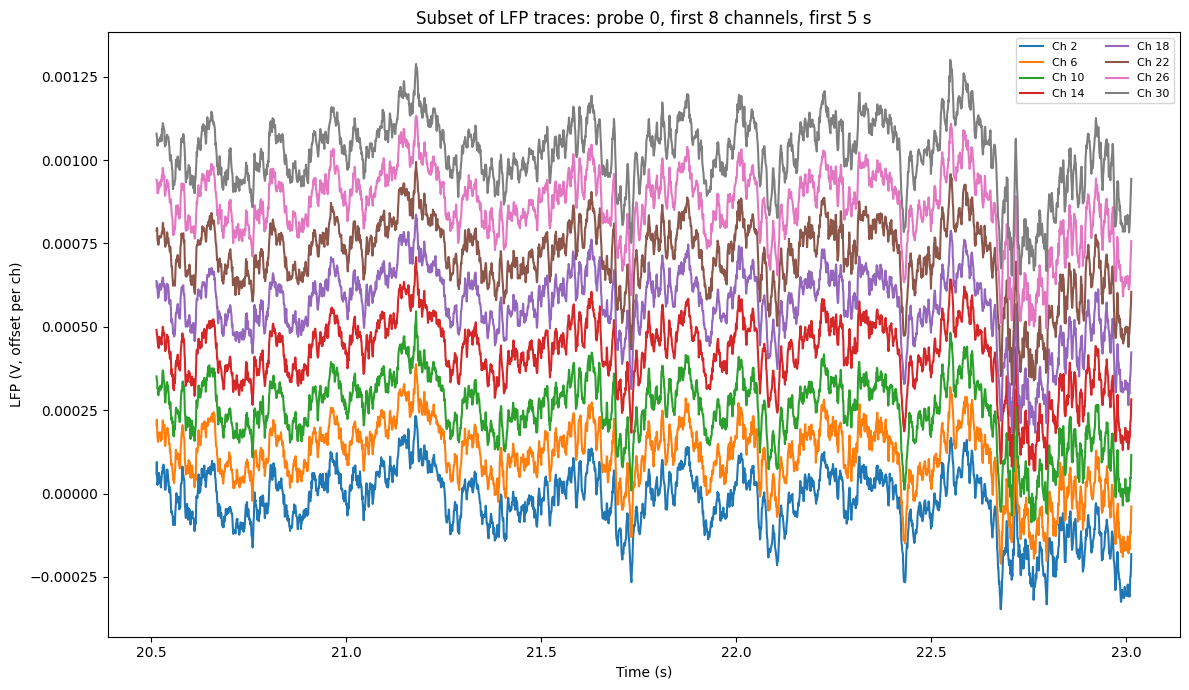

In [7]:
plt.figure(figsize=(12, 7))
offset = 150e-6  # 150 microvolts vertical offset between channels
for i in range(n_channels):
    # Use the index as the channel ID for labeling
    plt.plot(lfp_timestamps, lfp_data[:, i] + i * offset, label=f'Ch {electrodes_table.index[i]}')
plt.xlabel("Time (s)")
plt.ylabel("LFP (V, offset per ch)")
plt.title("Subset of LFP traces: probe 0, first 8 channels, first 5 s")
plt.legend(loc="upper right", fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

## Exploring LFP channel locations

Let's make a scatter plot of the vertical and horizontal position of each channel (from the electrode table):

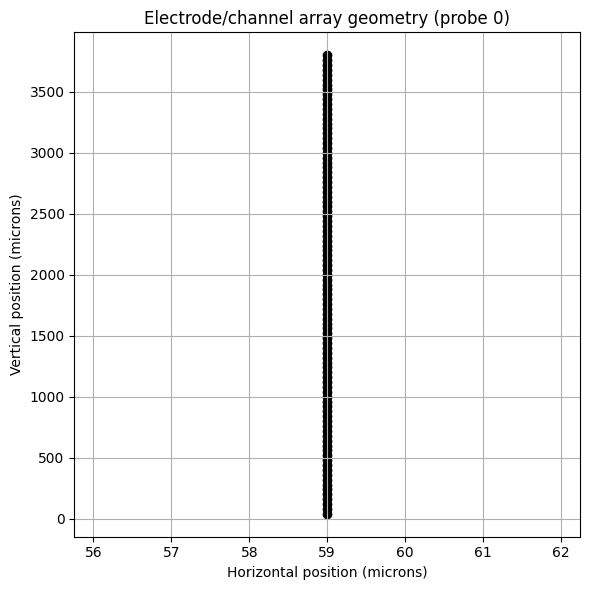

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(
    electrodes_table["probe_horizontal_position"],
    electrodes_table["probe_vertical_position"],
    c="k"
)
plt.xlabel("Horizontal position (microns)")
plt.ylabel("Vertical position (microns)")
plt.title("Electrode/channel array geometry (probe 0)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Neurosift interactive exploration

You can explore this NWB file using [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft), where you can view and interact with signals, units, and metadata.

## Summary and future directions

This notebook demonstrated how to:
- List and describe Dandiset 000690 assets and contents using the DANDI API
- Stream and open a remote NWB file (extracellular ephys, LFP) with remfile, h5py, and pynwb
- Inspect electrode/channel metadata
- Visualize a subset of multichannel LFP data
- Relate channel IDs to their physical positions on the probe

**Possible next steps for analysis:**
- Explore spike train/unit data if available in other files
- Examine LFP activity during different stimulus epochs
- Analyze higher-order structure in time or across channels
- Combine ephys data with stimulus annotations
- Investigate filtering or impedance properties of channels

For more in-depth analyses, refer to the full Dandiset and associated documentation.  
When adapting this code for your own use, always validate and double-check the code's behavior on your data.